# Pog Competition Baseline
- LightGBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
plt.style.use('ggplot')

#import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import iplot

from wordcloud import WordCloud
import string

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
train = pd.read_parquet('../input/kaggle-pog-series-s01e01/train.parquet')
test = pd.read_parquet('../input/kaggle-pog-series-s01e01/test.parquet')
ss = pd.read_csv('../input/kaggle-pog-series-s01e01/sample_submission.csv')

# Data Analysis

In [3]:
print("Number of rows in training set = ", train.shape[0], " \nNumber of columns is training set = " , train.shape[1])

Number of rows in training set =  92275  
Number of columns is training set =  20


In [4]:
print("Number of rows in test set = ", test.shape[0], " \nNumber of columns is test set = " , test.shape[1])

Number of rows in test set =  5800  
Number of columns is test set =  16


In [5]:
train.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


In [6]:
train.duplicated().sum()

0

In [7]:
train_num_col = train.select_dtypes(exclude=['object']).columns
train_num = train[train_num_col]

In [8]:
train_num.describe().T.style.background_gradient(cmap='Dark2_r')

,count,mean,std,min,25%,50%,75%,max
categoryId,92275.000000,18.733416,6.866404,1.000000,17.000000,20.000000,24.000000,29.000000
view_count,92275.000000,2779091.258196,7364112.645730,38510.000000,531244.000000,1100045.000000,2482274.500000,264407389.000000
likes,92275.000000,152122.259008,437477.749589,0.000000,21363.000000,51692.000000,131282.500000,16021534.000000
dislikes,92275.000000,3110.977307,13342.743386,0.000000,368.000000,852.000000,2239.000000,879354.000000
comment_count,92275.000000,13735.741219,96726.820493,0.000000,1692.000000,3856.000000,9322.000000,6738537.000000
duration_seconds,90099.000000,760.614602,5816.818926,3.000000,184.000000,446.000000,854.000000,485620.000000
target,92275.000000,0.057060,0.040373,0.000000,0.028066,0.050784,0.075265,0.433503


# Heat Map

In [9]:
fig = px.imshow(train_num.corr())
fig.show()

There is positive correation between view count and no:of likes ,dislikes and comment_count, so we can check scatter plot of view count with these.

<AxesSubplot:xlabel='view_count', ylabel='likes'>

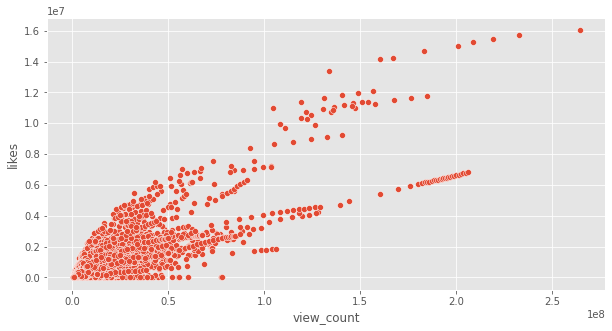

In [10]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='view_count', y= 'likes', data =train)

<AxesSubplot:xlabel='view_count', ylabel='dislikes'>

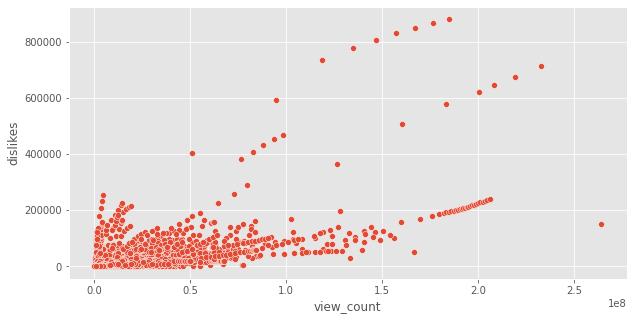

In [11]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='view_count', y= 'dislikes', data =train)

<AxesSubplot:xlabel='view_count', ylabel='comment_count'>

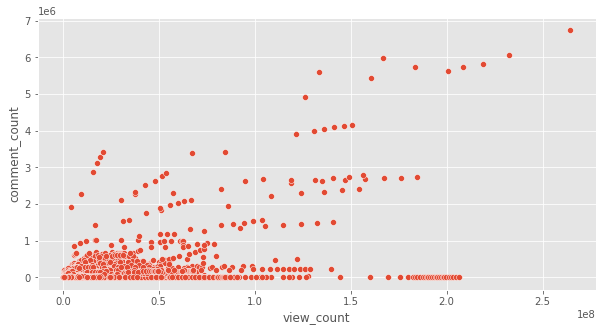

In [12]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='view_count', y= 'comment_count', data =train)

## Wordcloud channelTitle

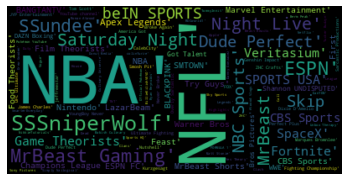

In [13]:
all_words = []

for text in train['channelTitle']:
    all_words.append(text)

wordcloud = WordCloud().generate(str(all_words))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Visualization of top 20 channelTitle

In [14]:
top_20 = train['channelTitle'].value_counts().nlargest(20)

fig = px.pie(train, values=top_20.values, names=top_20.index,  title='Top 20 channelTitle')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Setup KFold

In [15]:
cfg = {
    'TARGET' : 'target',
    'N_FOLDS' : 5,
    'RANDOM_STATE': 529,
    'N_ESTIMATORS' : 50_000,
    'LEARNING_RATE': 0.1
}

train_vids = train['video_id'].unique()

# Create Folds
- This is how we will later split when validating our models

In [16]:
kf = KFold(n_splits=cfg['N_FOLDS'],
           shuffle=True,
           random_state=cfg['RANDOM_STATE'])

# Create Folds
fold = 1
for tr_idx, val_idx in kf.split(train_vids):
    fold_vids = train_vids[val_idx]
    train.loc[train['video_id'].isin(fold_vids), 'fold'] = fold
    fold += 1
train['fold'] = train['fold'].astype('int')

# Feature Engineering

In [17]:
def create_features(df, train=True):
    """
    Adds features to training or test set.
    """
    df['publishedAt'] = pd.to_datetime(df['publishedAt'])
    df['trending_date'] = pd.to_datetime(df['trending_date'], utc=True)
    
    # Feature 1 - Age of video
    df['video_age_seconds'] = (df['trending_date'] - df['publishedAt']) \
        .dt.total_seconds().astype('int')
    
    # Trending day of week As a category
    df['trending_dow'] = df['trending_date'].dt.day_name()
    df['trending_dow']= df['trending_dow'].astype('category')
    
    df['published_dow'] = df['publishedAt'].dt.day_name()
    df['published_dow']= df['published_dow'].astype('category')
    
    df['categoryId'] = df['categoryId'].astype('category')
    
    df['channel_occurance'] = df['channelId'].map(
        df['channelId'].value_counts().to_dict())

    df['channel_unique_video_count'] = df['channelId'].map(
        df.groupby('channelId')['video_id'].nunique().to_dict())
    
    df['video_occurance_count'] = df.groupby('video_id')['trending_date'] \
        .rank().astype('int')
    
    return df

In [18]:
train['isTrain'] = True
test['isTrain'] = False
tt = pd.concat([train, test]).reset_index(drop=True).copy()
tt = create_features(tt)
train_feats = tt.query('isTrain').reset_index(drop=True).copy()
test_feats = tt.query('isTrain == False').reset_index(drop=True).copy()

# Set Target and Features

In [19]:
FEATURES = ['video_age_seconds',
            'trending_dow',
            'published_dow',
            'duration_seconds',
            'categoryId',
            'comments_disabled',
            'ratings_disabled',
            'channel_occurance',
            'channel_unique_video_count',
            'video_occurance_count'
]

TARGET = ['target']

# Train LGBM Model

In [20]:
X_test = test_feats[FEATURES]
oof = train_feats[['id','target','fold']].reset_index(drop=True).copy()
submission_df = test[['id']].copy()

In [21]:
regs = []
fis = []
# Example Fold 1
for fold in range(1, 6):
    print(f'===== Running for fold {fold} =====')
    # Split train / val
    X_tr = train_feats.query('fold != @fold')[FEATURES]
    y_tr = train_feats.query('fold != @fold')[TARGET]
    X_val = train_feats.query('fold == @fold')[FEATURES]
    y_val = train_feats.query('fold == @fold')[TARGET]
    print(X_tr.shape, y_tr.shape, X_val.shape, y_val.shape)

    # Create our model
    reg = lgb.LGBMRegressor(n_estimators=cfg['N_ESTIMATORS'],
                            learning_rate=cfg['LEARNING_RATE'],
                            objective='mae',
                            metric=['mae'],
                            importance_type='gain'
                           )
    # Fit our model
    reg.fit(X_tr, y_tr,
            eval_set=(X_val, y_val),
            early_stopping_rounds=500,
            verbose=200,
           )

    # Predicting on validation set
    fold_preds = reg.predict(X_val,
                             num_iteration=reg.best_iteration_)
    oof.loc[oof['fold'] == fold, 'preds'] = fold_preds
    # Score validation set
    fold_score = mean_absolute_error(
        oof.query('fold == 1')['target'],
            oof.query('fold == 1')['preds']
    )

    # Creating a feature importance dataframe
    fi = pd.DataFrame(index=reg.feature_name_,
                 data=reg.feature_importances_,
                 columns=[f'{fold}_importance'])

    # Predicting on test
    fold_test_pred = reg.predict(X_test,
                num_iteration=reg.best_iteration_)
    submission_df[f'pred_{fold}'] = fold_test_pred
    print(f'Score of this fold is {fold_score:0.6f}')
    regs.append(reg)
    fis.append(fi)

===== Running for fold 1 =====
(73587, 10) (73587, 1) (18688, 10) (18688, 1)
[200]	valid_0's l1: 0.0197337
[400]	valid_0's l1: 0.0192995
[600]	valid_0's l1: 0.0191393
[800]	valid_0's l1: 0.0189933
[1000]	valid_0's l1: 0.0188859
[1200]	valid_0's l1: 0.0187971
[1400]	valid_0's l1: 0.0187607
[1600]	valid_0's l1: 0.0187444
[1800]	valid_0's l1: 0.0187122
[2000]	valid_0's l1: 0.0187172
[2200]	valid_0's l1: 0.0187474
Score of this fold is 0.018691
===== Running for fold 2 =====
(73999, 10) (73999, 1) (18276, 10) (18276, 1)
[200]	valid_0's l1: 0.0190757
[400]	valid_0's l1: 0.0186748
[600]	valid_0's l1: 0.0184466
[800]	valid_0's l1: 0.0183378
[1000]	valid_0's l1: 0.0182279
[1200]	valid_0's l1: 0.0181079
[1400]	valid_0's l1: 0.0180576
[1600]	valid_0's l1: 0.0180364
[1800]	valid_0's l1: 0.0180174
[2000]	valid_0's l1: 0.0180267
[2200]	valid_0's l1: 0.0180626
Score of this fold is 0.018691
===== Running for fold 3 =====
(73838, 10) (73838, 1) (18437, 10) (18437, 1)
[200]	valid_0's l1: 0.0197284
[40

# Evaluation out of all out of fold predictions

In [22]:
oof_score = mean_absolute_error(oof['target'], oof['preds'])
print(f'Out of fold score {oof_score:0.6f}')

Out of fold score 0.018522


# Look at Fold Feature Importances

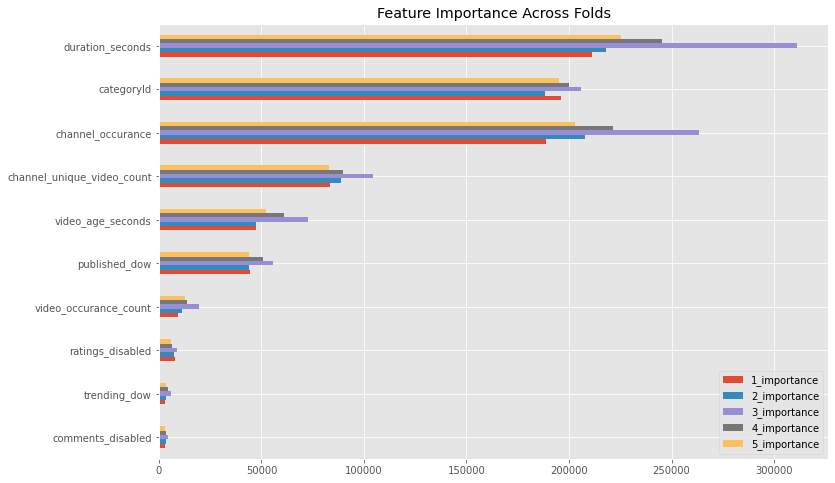

In [23]:
fis_df = pd.concat(fis, axis=1)
fis_df.sort_values('1_importance').plot(kind='barh', figsize=(12, 8),
                                       title='Feature Importance Across Folds')
plt.show()

# Create Submission

<AxesSubplot:>

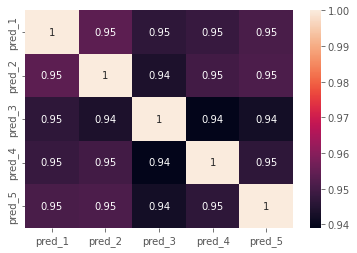

In [24]:
pred_cols = [c for c in submission_df.columns if c.startswith('pred_')]

submission_df['target'] = submission_df[pred_cols].mean(axis=1)

#Visually check correlation between fold predictions
sns.heatmap(submission_df[pred_cols].corr(), annot=True)

In [25]:
submission_df[['id','target']].to_csv('submission.csv', index=False)